In [160]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [76]:
from keras.layers import LSTM, Dense, Dropout
from keras.models import Sequential

In [3]:
np.random.seed(1337)

In [4]:
data = pd.read_csv("../data/ml-latest-small/ratings.csv")

In [5]:
good_ratings_abv = 2.0

In [39]:
def get_subset_for_user(userID):
    subset = data[(data.userId == userID) & (data.rating > good_ratings_abv)]
    subset = subset.sort_values(by = "timestamp").movieId.values.astype('int32')
    subset = np.reshape(subset, (len(subset), 1))
    sub_x = subset
    sub_y = sub_x[1:]
    return sub_x[:-1].tolist(), sub_y.tolist()

In [196]:
trainX, trainY = [], []
for uid in data.userId.unique():
    tx, ty = get_subset_for_user(uid)
#     print(tx, "\n\n\n", ty, "\n\n\n\n")
    trainX.extend(tx)
    trainY.extend(ty)

In [197]:
trainX = np.array(trainX)
trainY = np.array(trainY)

In [198]:
trainX.shape, trainY.shape

((85948, 1), (85948, 1))

In [199]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, 1))
# trainY = np.reshape(trainY, (trainY.shape[0], 1, 1))

In [200]:
trainX.shape, trainY.shape

((85948, 1, 1), (85948, 1))

In [202]:
model = Sequential()
model.add(LSTM(input_dim = 1, output_dim = 500, return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(1000, return_sequences = False))
model.add(Dropout(0.2))
# model.add(LSTM(500, return_sequences = False))
# model.add(Dropout(0.2))
model.add(Dense(output_dim=1))
model.compile(loss='mse', optimizer='adagrad')

In [203]:
h = model.fit(x = trainX, y = trainY, nb_epoch=30, batch_size=1000, verbose=1)

Epoch 1/30
85948/85948 [==============================] - 85s - loss: 839670133.8283      

KeyboardInterrupt: 

In [175]:
h.params

{'batch_size': 500,
 'do_validation': False,
 'metrics': ['loss'],
 'nb_epoch': 10,
 'nb_sample': 85948,
 'verbose': 1}

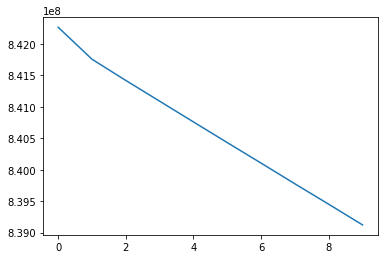

In [204]:
plt.plot(h.epoch, h.history['loss'])

In [123]:
test = trainX[0]

In [124]:
test = test.reshape(1, 1, 1)

In [205]:
model.predict(test)

array([[ 490.13314819]], dtype=float32)